# EDA sobre Taxis Amarillos, Taxis Verdes y Taxis de Alquiler.
El objetivo de este análisis es obtener información sobre estos tipos de taxis y sus características. Algunas de las preguntas que podríamos responder mediante el EDA incluyen:

- ¿Cuál es la distribución geográfica de los taxis amarillos, verdes y de alquiler?
- ¿Cuál es la duración promedio de los viajes en cada tipo de taxi?
- ¿Cuál es la tarifa promedio de los viajes en cada tipo de taxi?
- ¿Existe alguna relación entre la duración del viaje y la tarifa cobrada en cada tipo de taxi?

Para realizar este análisis, utilice diversas herramientas y técnicas, como visualizaciones gráficas, estadísticas descriptivas y análisis comparativos. También utilice las bibliotecas necesarias para este Analisis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
taxis_amarillos = pd.read_parquet('yellow_tripdata_2023-10_clean.parquet')
taxis_verdes = pd.read_parquet('green_tripdata_2023-10.parquet')
taxis_alquilados = pd.read_parquet('fhvhv_tripdata_2023-10_clean.parquet')
taxis_electricos = pd.read_csv('ElectricCarData_Clean.csv')

In [3]:
taxis_electricos

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [4]:
# Calcular la duración del viaje en minutos
taxis_verdes.loc[:,'trip_duration'] = (taxis_verdes['lpep_dropoff_datetime'] - taxis_verdes['lpep_pickup_datetime']).dt.total_seconds() / 60
taxis_amarillos.loc[:,'trip_duration'] = (taxis_amarillos['tpep_dropoff_datetime'] - taxis_amarillos['tpep_pickup_datetime']).dt.total_seconds() / 60
taxis_alquilados.loc[:,'trip_time'] = (taxis_alquilados['dropoff_datetime'] - taxis_alquilados['pickup_datetime']).dt.total_seconds() / 60

# Filtrar los viajes que duran 30 minutos o menos
taxis_verdes = taxis_verdes[taxis_verdes['trip_duration'] <= 30]
taxis_amarillos = taxis_amarillos[taxis_amarillos['trip_duration'] <= 30]
taxis_alquilados = taxis_alquilados[taxis_alquilados['trip_time'] <= 30]

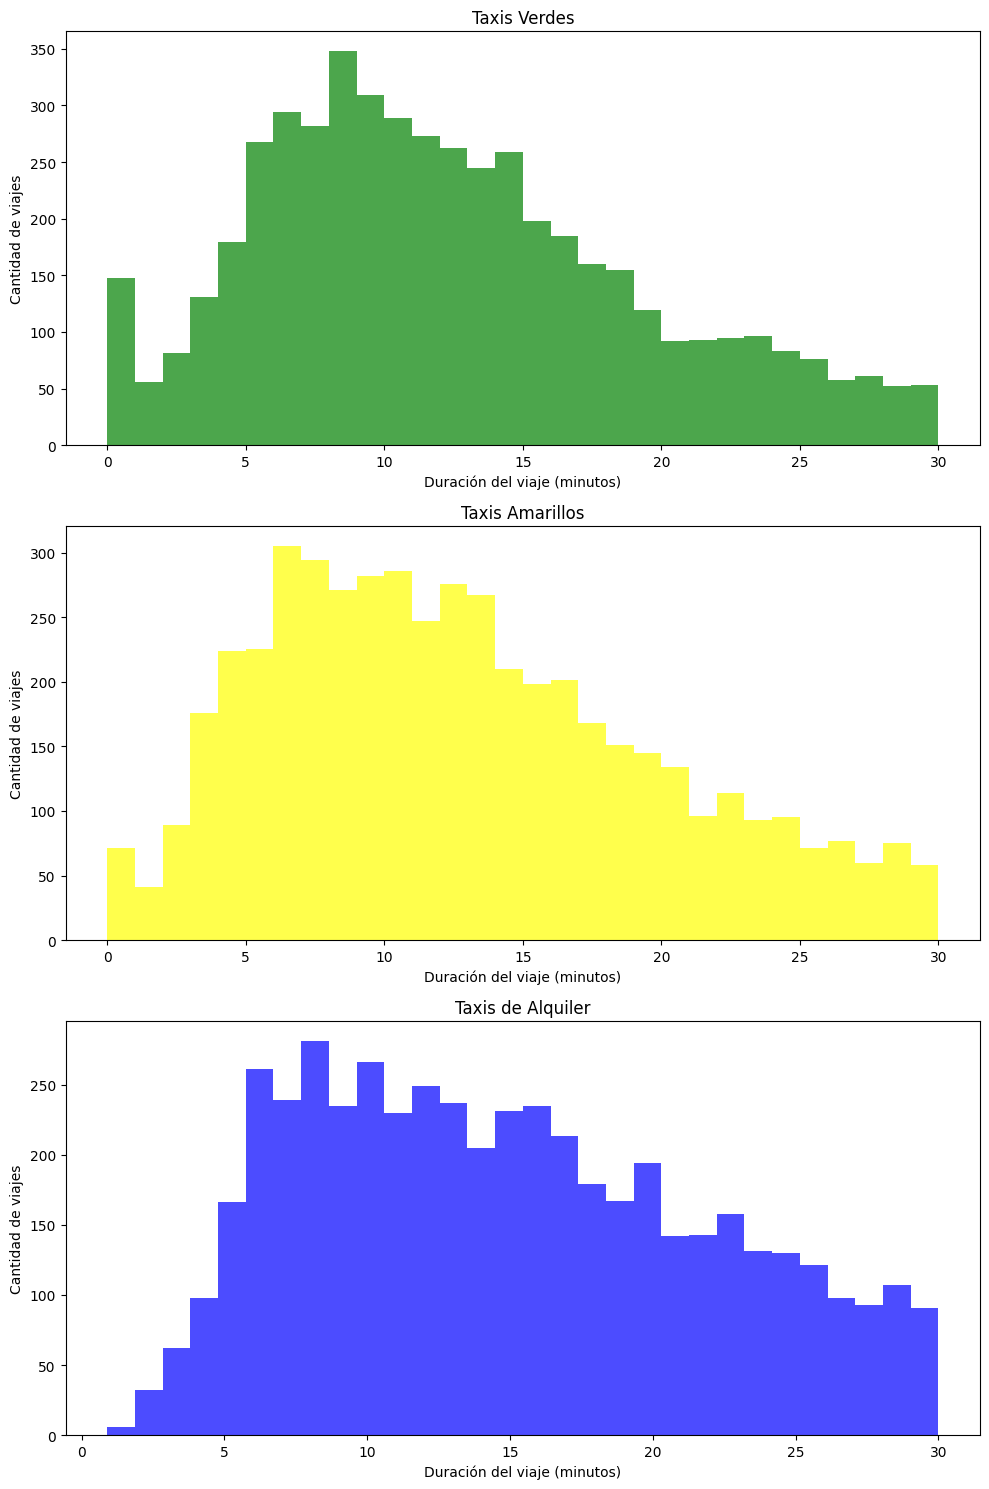

In [5]:
# Tomar una muestra de los datos
taxis_verdes_sample = taxis_verdes.sample(n=5000, random_state=1)
taxis_amarillos_sample = taxis_amarillos.sample(n=5000, random_state=1)
taxis_alquilados_sample = taxis_alquilados.sample(n=5000, random_state=1)

# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(3, figsize=(10, 15))

# Crear un histograma para los taxis verdes
axs[0].hist(taxis_verdes_sample['trip_duration'], bins=30, color='green', alpha=0.7)
axs[0].set_title('Taxis Verdes')
axs[0].set_xlabel('Duración del viaje (minutos)')
axs[0].set_ylabel('Cantidad de viajes')

# Crear un histograma para los taxis amarillos
axs[1].hist(taxis_amarillos_sample['trip_duration'], bins=30, color='yellow', alpha=0.7)
axs[1].set_title('Taxis Amarillos')
axs[1].set_xlabel('Duración del viaje (minutos)')
axs[1].set_ylabel('Cantidad de viajes')

# Crear un histograma para los taxis de alquiler
axs[2].hist(taxis_alquilados_sample['trip_time'], bins=30, color='blue', alpha=0.7)
axs[2].set_title('Taxis de Alquiler')
axs[2].set_xlabel('Duración del viaje (minutos)')
axs[2].set_ylabel('Cantidad de viajes')

# Ajustar el espacio entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

In [45]:
# Convertir la columna de fecha y hora a formato de fecha y hora si aún no lo está
taxis_amarillos['tpep_pickup_datetime'] = pd.to_datetime(taxis_amarillos['tpep_pickup_datetime'])

# Crear una columna para el mes y la hora del día
taxis_amarillos['month'] = taxis_amarillos['tpep_pickup_datetime'].dt.month
taxis_amarillos['hour'] = taxis_amarillos['tpep_pickup_datetime'].dt.hour

# Definir los rangos de horas para la mañana, tarde y noche
bins = [0, 6, 12, 18, 24]
periodo = ['Noche', 'Mañana', 'Tarde', 'Noche2']
taxis_amarillos['periodo_dia'] = pd.cut(taxis_amarillos['hour'], bins=bins, labels=periodo, right=False)
taxis_amarillos['periodo_dia'] = taxis_amarillos['periodo_dia'].replace('Noche2', 'Noche')

# Calcular la cantidad de dinero generada por cada taxi en cada período del día
dinero_ganado_por_dia = taxis_amarillos.groupby(['VendorID', 'month', 'periodo_dia'], observed=True)['total_amount'].sum().reset_index()

# Calcular la cantidad de dinero generada por cada taxi en cada mes
dinero_ganado_por_mes = taxis_amarillos.groupby(['VendorID', 'month'], observed=True)['total_amount'].sum().reset_index()

# Filtrar para mostrar solo los datos del mes 10 usando el metodo query
dinero_ganado_taxi_amarillos_dia_mes_10 = dinero_ganado_por_dia.query('month == 10')
dinero_ganado_taxi_amarillos_mes_mes_10 = dinero_ganado_por_mes.query('month == 10')


In [49]:
# Imprimir los primeros 3 registros de dinero ganado por día
dinero_ganado_taxi_amarillos_dia_mes_10.head(6)

,VendorID,month,periodo_dia,total_amount
0,1,10,Noche,6499439.20
1,1,10,Mañana,3436528.64
2,1,10,Tarde,5371391.10
5,2,10,Noche,23999022.16
6,2,10,Mañana,10155934.62
7,2,10,Tarde,16339551.53


In [50]:
# Imprimir los registros de dinero ganado por mes
dinero_ganado_taxi_amarillos_mes_mes_10.head()

,VendorID,month,total_amount
0,1,10,15307358.94
3,2,10,50494508.31


visualizo el dinero ganado por dia y por mes

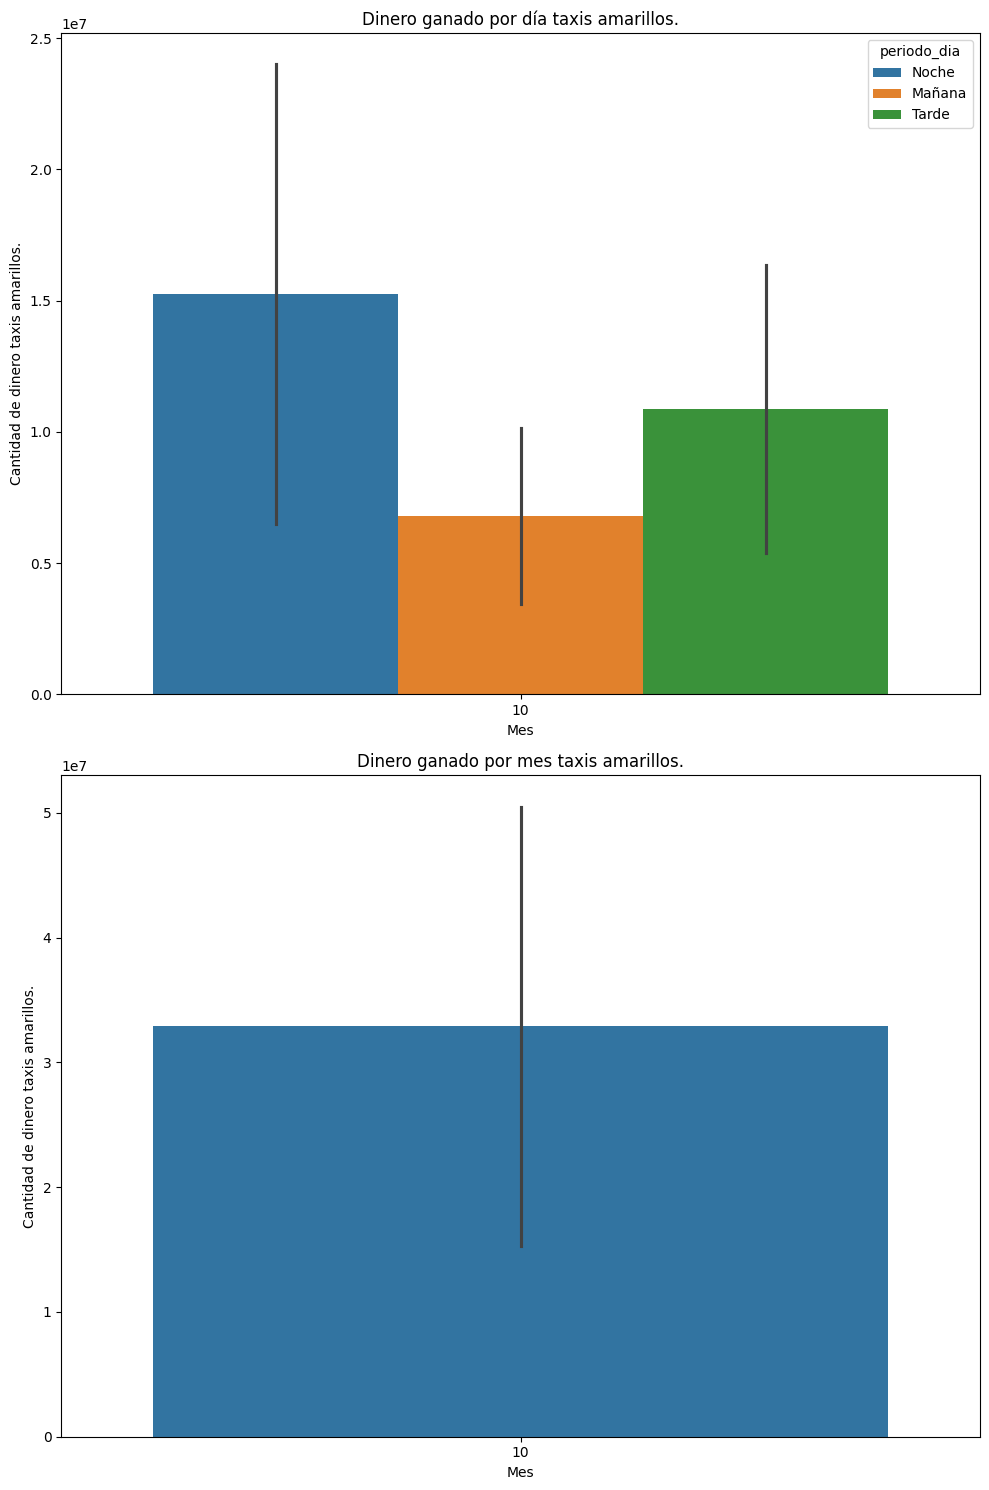

In [51]:
# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(2, figsize=(10, 15))

# Crear un gráfico de barras para el dinero taxis amarillos. ganado por día
sns.barplot(x='month', y='total_amount', hue='periodo_dia', data=dinero_ganado_taxi_amarillos_dia_mes_10, ax=axs[0])
axs[0].set_title('Dinero ganado por día taxis amarillos.')
axs[0].set_xlabel('Mes')
axs[0].set_ylabel('Cantidad de dinero taxis amarillos.')

# Crear un gráfico de barras para el dinero taxis amarillos. ganado por mes
sns.barplot(x='month', y='total_amount', data=dinero_ganado_taxi_amarillos_mes_mes_10, ax=axs[1])
axs[1].set_title('Dinero ganado por mes taxis amarillos.')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Cantidad de dinero taxis amarillos.')

# Ajustar el espacio entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

taxis verdes

In [52]:
# Convertir la columna de fecha y hora a formato de fecha y hora si aún no lo está
taxis_verdes['lpep_pickup_datetime'] = pd.to_datetime(taxis_verdes['lpep_pickup_datetime'])

# Crear una columna para el mes y la hora del día
taxis_verdes['month'] = taxis_verdes['lpep_pickup_datetime'].dt.month
taxis_verdes['hour'] = taxis_verdes['lpep_pickup_datetime'].dt.hour

# Definir los rangos de horas para la mañana, tarde y noche
bins = [0, 6, 12, 18, 24]
periodo = ['Noche', 'Mañana', 'Tarde', 'Noche2']
taxis_verdes['periodo_dia'] = pd.cut(taxis_verdes['hour'], bins=bins, labels=periodo, right=False)
taxis_verdes['periodo_dia'] = taxis_verdes['periodo_dia'].replace('Noche2', 'Noche')

# Calcular la cantidad de dinero generada por cada taxi en cada período del día
sns.barplot(x='month', y='total_amount', hue='periodo_dia', data=dinero_ganado_taxi_amarillos_dia_mes_10, ax=axs[0])
dinero_ganado_por_dia_green = taxis_verdes.groupby(['VendorID', 'month', 'periodo_dia'], observed=True)['total_amount'].sum().reset_index()

# Calcular la cantidad de dinero generada por cada taxi en cada mes
sns.barplot(x='month', y='total_amount', hue='periodo_dia', data=dinero_ganado_taxi_amarillos_dia_mes_10, ax=axs[0])
dinero_ganado_por_mes_green = taxis_verdes.groupby(['VendorID', 'month'], observed=True)['total_amount'].sum().reset_index()

#Filtrar para mostrar solo los datos del mes 10 con el operador de comparación booleana
dinero_ganado_taxis_verdes_dia_mes_10 = dinero_ganado_por_dia_green[dinero_ganado_por_dia_green['month'] == 10]
dinero_ganado_taxis_verdes_mes_mes_10 = dinero_ganado_por_mes_green[dinero_ganado_por_mes_green['month'] == 10]

In [53]:
dinero_ganado_taxis_verdes_dia_mes_10.head(6)

,VendorID,month,periodo_dia,total_amount
0,1,10,Noche,47108.90
1,1,10,Mañana,41418.56
2,1,10,Tarde,55874.62
4,2,10,Noche,415371.98
5,2,10,Mañana,268553.00
6,2,10,Tarde,415208.09


In [54]:
dinero_ganado_taxis_verdes_mes_mes_10.head()

,VendorID,month,total_amount
0,1,10,144402.08
2,2,10,1099133.07


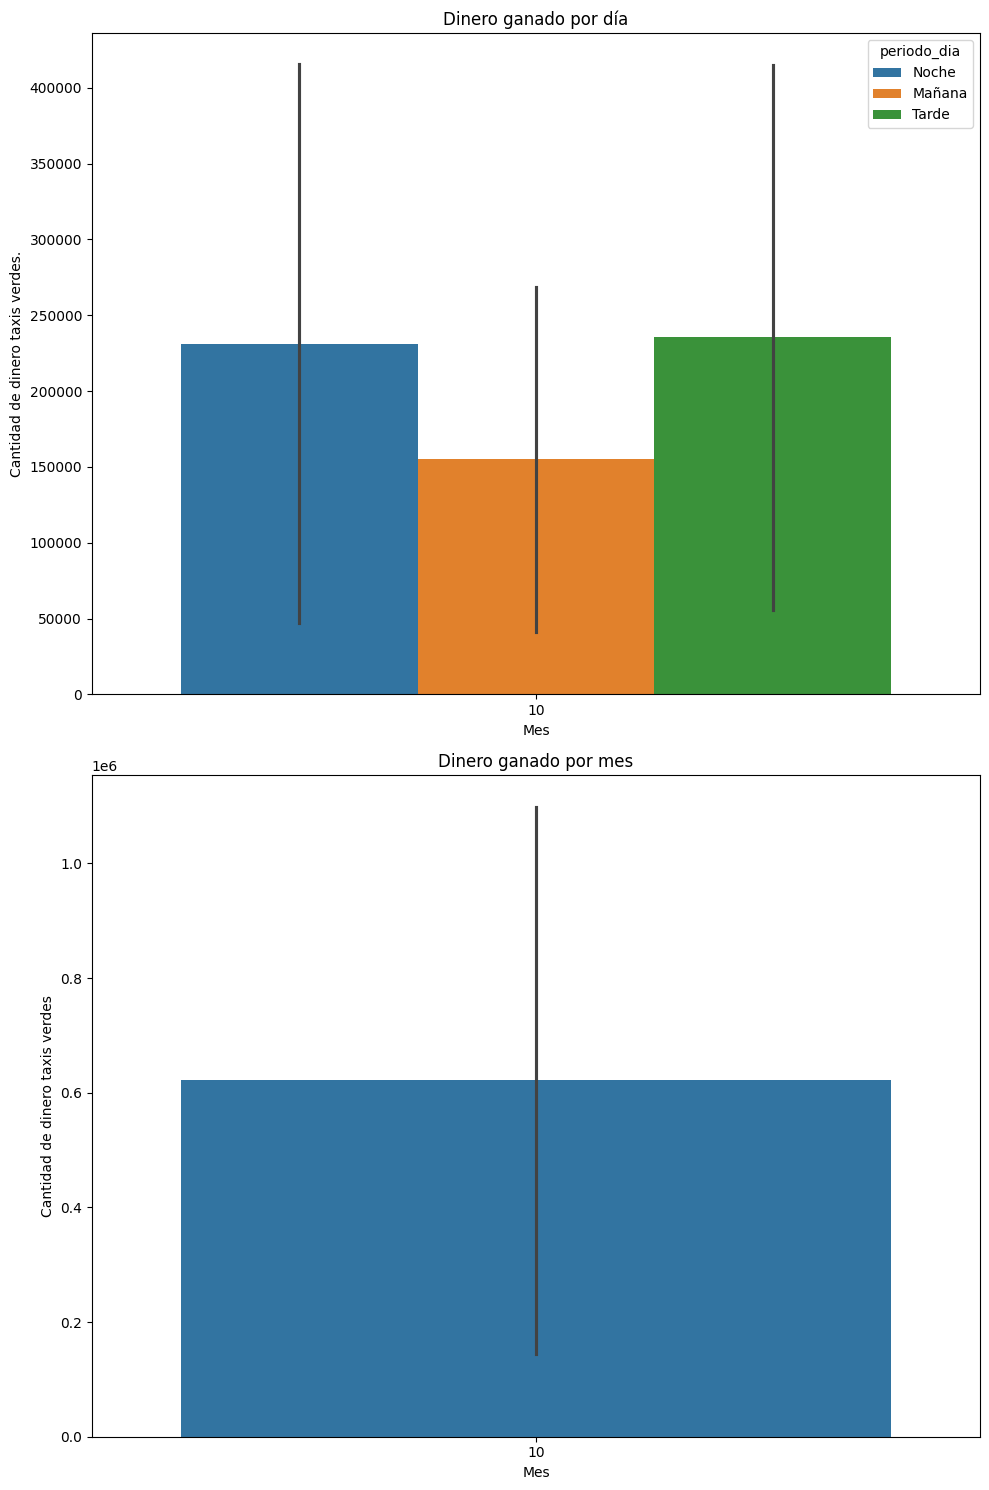

In [55]:
# Crear una figura y un conjunto de subtramas
fig, axs = plt.subplots(2, figsize=(10, 15))

# Crear un gráfico de barras para el dinero taxis verdes ganado por día
sns.barplot(x='month', y='total_amount', hue='periodo_dia', data=dinero_ganado_taxis_verdes_dia_mes_10, ax=axs[0])
axs[0].set_title('Dinero ganado por día')
axs[0].set_xlabel('Mes')
axs[0].set_ylabel('Cantidad de dinero taxis verdes.')

# Crear un gráfico de barras para el dinero taxis verdes ganado por mes
sns.barplot(x='month', y='total_amount', data=dinero_ganado_taxis_verdes_mes_mes_10, ax=axs[1])
axs[1].set_title('Dinero ganado por mes')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Cantidad de dinero taxis verdes')

# Ajustar el espacio entre las subtramas
plt.tight_layout()

# Mostrar la figura
plt.show()

taxis alquilados


In [57]:
# Convertir la columna de fecha y hora a formato de fecha y hora si aún no lo está
taxis_alquilados['pickup_datetime'] = pd.to_datetime(taxis_alquilados['pickup_datetime'])

# Crear una columna para el mes y la hora del día
taxis_alquilados['month'] = taxis_alquilados['pickup_datetime'].dt.month
taxis_alquilados['hour'] = taxis_alquilados['pickup_datetime'].dt.hour

# Definir los rangos de horas para la mañana, tarde y noche
bins = [0, 6, 12, 18, 24]
periodo = ['Noche', 'Mañana', 'Tarde', 'Noche2']
taxis_alquilados['periodo_dia'] = pd.cut(taxis_alquilados['hour'], bins=bins, labels=periodo, right=False)
taxis_alquilados['periodo_dia'] = taxis_alquilados['periodo_dia'].replace('Noche2', 'Noche')

# Calcular la cantidad de dinero generada por cada taxi en cada período del día
dinero_ganado_por_dia_fhv = taxis_alquilados.groupby(['hvfhs_license_num', 'month', 'periodo_dia'], observed=True)['driver_pay'].sum().reset_index()

# Calcular la cantidad de dinero generada por cada taxi en cada mes
dinero_ganado_por_mes_fhv = taxis_alquilados.groupby(['hvfhs_license_num', 'month'], observed=True)['driver_pay'].sum().reset_index()

# Filtrar para mostrar solo los datos del mes 10 usando el metodo query
dinero_ganado_taxi_alquilados_dia_mes_10 = dinero_ganado_por_dia_fhv.query('month == 10')
dinero_ganado_taxi_alquilados_mes_mes_10 = dinero_ganado_por_mes_fhv.query('month == 10')


In [59]:
dinero_ganado_taxi_alquilados_dia_mes_10.head(6)

,hvfhs_license_num,month,periodo_dia,driver_pay
0,HV0003,10,Noche,82456454.95
1,HV0003,10,Mañana,39903602.63
2,HV0003,10,Tarde,43223840.04
3,HV0005,10,Noche,63530.75
4,HV0005,10,Mañana,53883.96
5,HV0005,10,Tarde,94598.71


In [60]:
dinero_ganado_taxi_alquilados_mes_mes_10.head()

,hvfhs_license_num,month,driver_pay
0,HV0003,10,1.655839e+08
1,HV0005,10,2.120134e+05


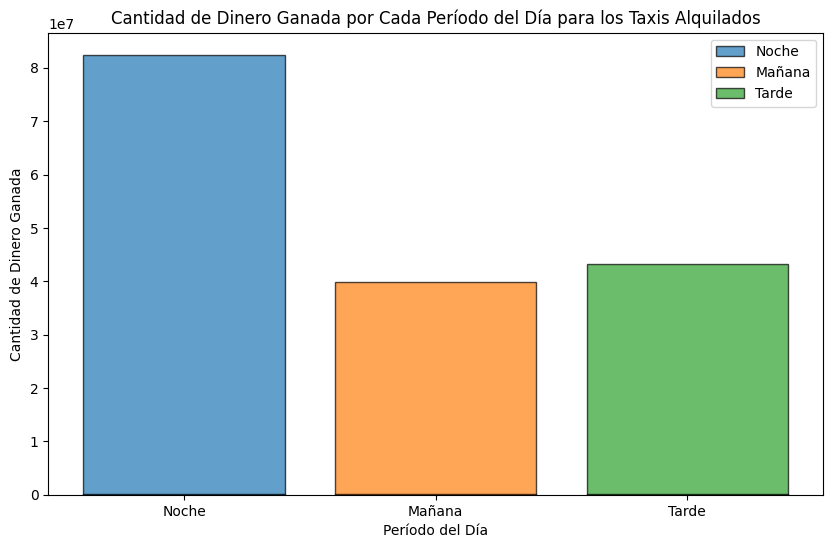

In [61]:
# Crear un gráfico de barras de la cantidad de dinero ganada por cada período del día
plt.figure(figsize=(10,6))
for period in ['Noche', 'Mañana', 'Tarde']:
    subset = dinero_ganado_por_dia_fhv[dinero_ganado_por_dia_fhv['periodo_dia'] == period]
    plt.bar(subset['periodo_dia'], subset['driver_pay'], label=period, alpha=0.7, edgecolor='black')

plt.xlabel('Período del Día')
plt.ylabel('Cantidad de Dinero Ganada')
plt.title('Cantidad de Dinero Ganada por Cada Período del Día para los Taxis Alquilados')
plt.legend()
plt.show()


zonas por donde andan los taxis.

In [62]:
zonas_taxis= pd.read_csv('csv/taxi+_zone_lookup.csv')
zonas_taxis.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [63]:
zonas_taxis.shape

(265, 4)

En esta parte unire columnas a taxis amarillos.

In [79]:
# Seleccionar columnas específicas del DataFrame taxis_amarillos
taxis_amarillos_seleccionados = taxis_amarillos[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'fare_amount', 'tolls_amount', 'total_amount','month', 'hour', 'periodo_dia']]

# Unir DataFrames basándote en las columnas 'PULocationID' y 'DOLocationID'
taxis_amarillos_seleccionados = pd.merge(taxis_amarillos_seleccionados, zonas_taxis, left_on='PULocationID', right_on='LocationID', suffixes=('', '_pickup'))
taxis_amarillos_seleccionados = pd.merge(taxis_amarillos_seleccionados, zonas_taxis, left_on='DOLocationID', right_on='LocationID', suffixes=('_pickup', '_dropoff'))

taxis_amarillos_seleccionados.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tolls_amount,total_amount,month,hour,periodo_dia,LocationID_pickup,Borough_pickup,Zone_pickup,service_zone_pickup,LocationID_dropoff,Borough_dropoff,Zone_dropoff,service_zone_dropoff
0,2023-10-01 00:16:44,2023-10-01 00:16:49,0.00,1.0,168,168,3.0,0.0,5.5,10,0,Noche,168,Bronx,Mott Haven/Port Morris,Boro Zone,168,Bronx,Mott Haven/Port Morris,Boro Zone
1,2023-10-01 00:23:24,2023-10-01 00:23:47,0.00,1.0,168,168,3.0,0.0,5.5,10,0,Noche,168,Bronx,Mott Haven/Port Morris,Boro Zone,168,Bronx,Mott Haven/Port Morris,Boro Zone
2,2023-10-01 04:34:07,2023-10-01 04:40:33,1.57,1.0,168,168,10.0,0.0,15.0,10,4,Noche,168,Bronx,Mott Haven/Port Morris,Boro Zone,168,Bronx,Mott Haven/Port Morris,Boro Zone
3,2023-10-01 07:53:44,2023-10-01 07:53:50,0.00,1.0,168,168,3.0,0.0,4.5,10,7,Mañana,168,Bronx,Mott Haven/Port Morris,Boro Zone,168,Bronx,Mott Haven/Port Morris,Boro Zone
4,2023-10-01 07:54:15,2023-10-01 07:54:21,0.00,1.0,168,168,3.0,0.0,4.5,10,7,Mañana,168,Bronx,Mott Haven/Port Morris,Boro Zone,168,Bronx,Mott Haven/Port Morris,Boro Zone


In [81]:
# Seleccionar columnas específicas del DataFrame taxis_verdes
taxis_verdes_seleccionados = taxis_verdes[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'fare_amount','total_amount','month', 'hour', 'periodo_dia']]

# Unir DataFrames basándote en las columnas 'PULocationID' y 'DOLocationID'
taxis_verdes_seleccionados = pd.merge(taxis_verdes_seleccionados, zonas_taxis, left_on='PULocationID', right_on='LocationID', suffixes=('', '_pickup'))
taxis_verdes_seleccionados = pd.merge(taxis_verdes_seleccionados, zonas_taxis, left_on='DOLocationID', right_on='LocationID', suffixes=('_pickup', '_dropoff'))

taxis_verdes_seleccionados.head()

,lpep_pickup_datetime,lpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,total_amount,month,hour,periodo_dia,LocationID_pickup,Borough_pickup,Zone_pickup,service_zone_pickup,LocationID_dropoff,Borough_dropoff,Zone_dropoff,service_zone_dropoff
0,2023-10-01 00:57:33,2023-10-01 01:07:58,1.45,1.0,166,74,12.1,17.52,10,0,Noche,166,Manhattan,Morningside Heights,Boro Zone,74,Manhattan,East Harlem North,Boro Zone
1,2023-10-01 09:35:39,2023-10-01 09:46:27,2.13,1.0,166,74,13.5,16.11,10,9,Mañana,166,Manhattan,Morningside Heights,Boro Zone,74,Manhattan,East Harlem North,Boro Zone
2,2023-10-01 11:26:23,2023-10-01 11:33:41,0.80,1.0,166,74,8.6,10.61,10,11,Mañana,166,Manhattan,Morningside Heights,Boro Zone,74,Manhattan,East Harlem North,Boro Zone
3,2023-10-01 13:00:19,2023-10-01 13:18:38,1.96,1.0,166,74,17.0,18.50,10,13,Tarde,166,Manhattan,Morningside Heights,Boro Zone,74,Manhattan,East Harlem North,Boro Zone
4,2023-10-01 19:27:43,2023-10-01 19:42:29,2.00,1.0,166,74,13.5,15.00,10,19,Noche,166,Manhattan,Morningside Heights,Boro Zone,74,Manhattan,East Harlem North,Boro Zone


In [84]:
# Seleccionar columnas específicas del DataFrame taxis_alquilados
taxis_alquilados_seleccion = taxis_alquilados[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles', 'driver_pay','month', 'hour', 'periodo_dia']]

# Unir DataFrames basándote en las columnas 'PULocationID' y 'DOLocationID'
taxis_alquilados_seleccion = pd.merge(taxis_alquilados_seleccion, zonas_taxis, left_on='PULocationID', right_on='LocationID', suffixes=('', '_pickup'))
taxis_alquilados_seleccion = pd.merge(taxis_alquilados_seleccion, zonas_taxis, left_on='DOLocationID', right_on='LocationID', suffixes=('_pickup', '_dropoff'))

taxis_alquilados_seleccion.head()

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,driver_pay,month,hour,periodo_dia,LocationID_pickup,Borough_pickup,Zone_pickup,service_zone_pickup,LocationID_dropoff,Borough_dropoff,Zone_dropoff,service_zone_dropoff
0,HV0003,2023-10-01 00:39:13,2023-10-01 01:06:47,24,114,6.78,24.46,10,0,Noche,24,Manhattan,Bloomingdale,Yellow Zone,114,Manhattan,Greenwich Village South,Yellow Zone
1,HV0003,2023-10-01 13:28:12,2023-10-01 13:57:33,24,114,6.70,24.17,10,13,Tarde,24,Manhattan,Bloomingdale,Yellow Zone,114,Manhattan,Greenwich Village South,Yellow Zone
2,HV0003,2023-10-02 21:59:23,2023-10-02 22:20:35,24,114,6.62,20.65,10,21,Noche,24,Manhattan,Bloomingdale,Yellow Zone,114,Manhattan,Greenwich Village South,Yellow Zone
3,HV0003,2023-10-07 08:09:32,2023-10-07 08:36:19,24,114,6.15,23.20,10,8,Mañana,24,Manhattan,Bloomingdale,Yellow Zone,114,Manhattan,Greenwich Village South,Yellow Zone
4,HV0003,2023-10-07 12:20:35,2023-10-07 12:48:43,24,114,7.00,25.07,10,12,Tarde,24,Manhattan,Bloomingdale,Yellow Zone,114,Manhattan,Greenwich Village South,Yellow Zone


taxis amarillos por borough 

In [90]:
# Calcular la cantidad de dinero generada por cada taxi en cada período del día y por borough
dinero_ganado__taxis_amarillos_dia_borough = taxis_amarillos_seleccionados.groupby(['month', 'periodo_dia', 'Borough_pickup'], observed=True)['total_amount'].sum().reset_index()

# Calcular la cantidad de dinero generada por cada taxi en cada mes y por borough
dinero_ganado_taxis_amarillos_mes_borough = taxis_amarillos_seleccionados.groupby(['month', 'Borough_pickup'], observed=True)['total_amount'].sum().reset_index()

# Filtrar para mostrar solo los datos del mes 10 usando el metodo query
dinero_ganado_taxi_amarillos_mes_10_borough = dinero_ganado_taxis_amarillos_mes_borough.query('month == 10')

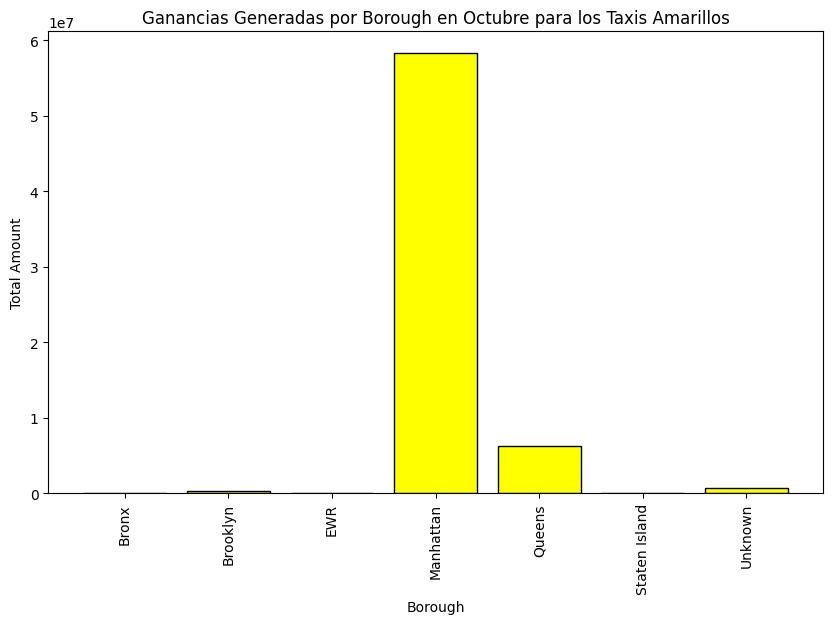

In [97]:
# Ordenar los datos por la cantidad de dinero generada
dinero_ganado_taxi_amarillos_mes_mes_10_borough = dinero_ganado_taxi_amarillos_mes_10_borough.sort_values('total_amount', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(dinero_ganado_taxi_amarillos_mes_10_borough['Borough_pickup'], dinero_ganado_taxi_amarillos_mes_10_borough['total_amount'],color='yellow',edgecolor='black')
plt.xlabel('Borough')
plt.ylabel('Total Amount')
plt.title('Ganancias Generadas por Borough en Octubre para los Taxis Amarillos')
plt.xticks(rotation=90)
plt.show()

taxis verdes por borougt

In [95]:
# Calcular la cantidad de dinero generada por cada taxi en cada período del día y por borough
dinero_ganado__taxis_verdes_dia_borough = taxis_verdes_seleccionados.groupby(['month', 'periodo_dia', 'Borough_pickup'], observed=True)['total_amount'].sum().reset_index()

# Calcular la cantidad de dinero generada por cada taxi en cada mes y por borough
dinero_ganado_taxis_verdes_mes_borough = taxis_verdes_seleccionados.groupby(['month', 'Borough_pickup'], observed=True)['total_amount'].sum().reset_index()

# Filtrar para mostrar solo los datos del mes 10 usando el metodo query
dinero_ganado_taxi_verdes_mes_10_borough = dinero_ganado_taxis_verdes_mes_borough.query('month == 10')

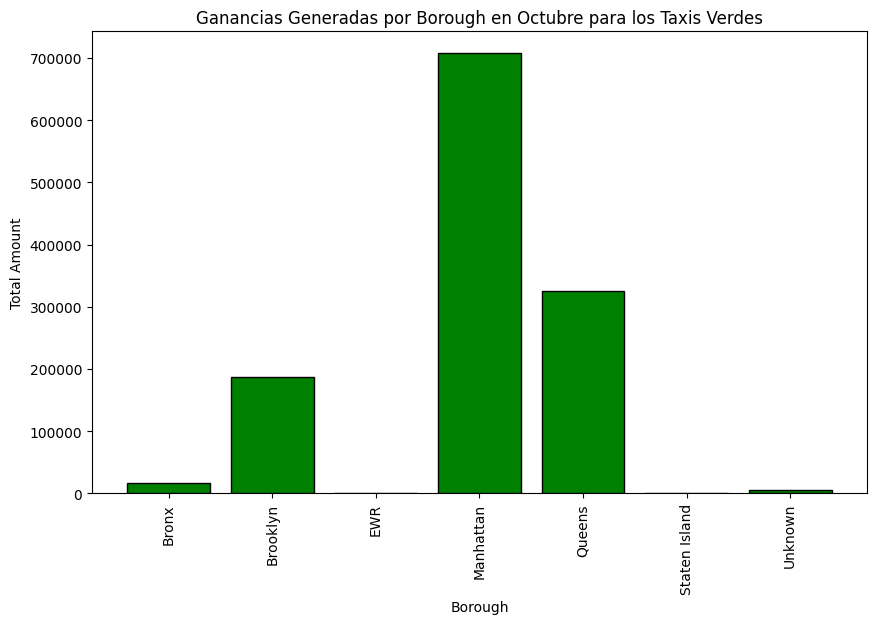

In [98]:
# Ordenar los datos por la cantidad de dinero generada
dinero_ganado_taxi_verdes_mes_mes_10_borough = dinero_ganado_taxi_verdes_mes_10_borough.sort_values('total_amount', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(dinero_ganado_taxi_verdes_mes_10_borough['Borough_pickup'], dinero_ganado_taxi_verdes_mes_10_borough['total_amount'],color='green',edgecolor='black')
plt.xlabel('Borough')
plt.ylabel('Total Amount')
plt.title('Ganancias Generadas por Borough en Octubre para los Taxis Verdes')
plt.xticks(rotation=90)
plt.show()

taxis alquiler por borougt

In [99]:
taxis_alquilados_seleccion

,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,driver_pay,month,hour,periodo_dia,LocationID_pickup,Borough_pickup,Zone_pickup,service_zone_pickup,LocationID_dropoff,Borough_dropoff,Zone_dropoff,service_zone_dropoff
0,HV0003,2023-10-01 00:39:13,2023-10-01 01:06:47,24,114,6.78,24.46,10,0,Noche,24,Manhattan,Bloomingdale,Yellow Zone,114,Manhattan,Greenwich Village South,Yellow Zone
1,HV0003,2023-10-01 13:28:12,2023-10-01 13:57:33,24,114,6.70,24.17,10,13,Tarde,24,Manhattan,Bloomingdale,Yellow Zone,114,Manhattan,Greenwich Village South,Yellow Zone
2,HV0003,2023-10-02 21:59:23,2023-10-02 22:20:35,24,114,6.62,20.65,10,21,Noche,24,Manhattan,Bloomingdale,Yellow Zone,114,Manhattan,Greenwich Village South,Yellow Zone
3,HV0003,2023-10-07 08:09:32,2023-10-07 08:36:19,24,114,6.15,23.20,10,8,Mañana,24,Manhattan,Bloomingdale,Yellow Zone,114,Manhattan,Greenwich Village South,Yellow Zone
4,HV0003,2023-10-07 12:20:35,2023-10-07 12:48:43,24,114,7.00,25.07,10,12,Tarde,24,Manhattan,Bloomingdale,Yellow Zone,114,Manhattan,Greenwich Village South,Yellow Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11441418,HV0003,2023-10-15 13:23:58,2023-10-15 13:28:52,176,110,0.98,5.68,10,13,Tarde,176,Staten Island,Oakwood,Boro Zone,110,Staten Island,Great Kills Park,Boro Zone
11441419,HV0003,2023-10-18 13:23:23,2023-10-18 13:27:54,176,110,1.19,5.39,10,13,Tarde,176,Staten Island,Oakwood,Boro Zone,110,Staten Island,Great Kills Park,Boro Zone
11441420,HV0003,2023-10-19 13:24:19,2023-10-19 13:28:01,176,110,0.96,5.40,10,13,Tarde,176,Staten Island,Oakwood,Boro Zone,110,Staten Island,Great Kills Park,Boro Zone
11441421,HV0003,2023-10-25 13:21:07,2023-10-25 13:23:57,176,110,0.96,5.40,10,13,Tarde,176,Staten Island,Oakwood,Boro Zone,110,Staten Island,Great Kills Park,Boro Zone


In [100]:
# Calcular la cantidad de dinero generada por cada taxi en cada período del día y por borough
dinero_ganado__taxis_alquilados_dia_borough = taxis_alquilados_seleccion.groupby(['month', 'periodo_dia', 'Borough_pickup'], observed=True)['driver_pay'].sum().reset_index()

# Calcular la cantidad de dinero generada por cada taxi en cada mes y por borough
dinero_ganado_taxis_alquilados_mes_borough = taxis_alquilados_seleccion.groupby(['month', 'Borough_pickup'], observed=True)['driver_pay'].sum().reset_index()

# Filtrar para mostrar solo los datos del mes 10 usando el metodo query
dinero_ganado_taxi_alquilados_mes_10_borough = dinero_ganado_taxis_alquilados_mes_borough.query('month == 10')

In [ ]:
# Ordenar los datos por la cantidad de dinero generada
dinero_ganado_taxi_alquilados_mes_10_borough = dinero_ganado_taxi_alquilados_mes_10_borough.sort_values('total_amount', ascending=False)

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(dinero_ganado_taxi_verdes_mes_10_borough['Borough_pickup'], dinero_ganado_taxi_verdes_mes_10_borough['total_amount'],color='green',edgecolor='black')
plt.xlabel('Borough')
plt.ylabel('Total Amount')
plt.title('Ganancias Generadas por Borough en Octubre para los Taxis Verdes')
plt.xticks(rotation=90)
plt.show()